In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io


In [2]:
df=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rain Category 1901-2010.csv",index_col=0)
df

,zone1,zone2,zone3,zone4,zone5,zone6
0,3,3,4,4,4,4
1,4,4,4,4,3,4
2,4,4,5,4,4,4
3,3,4,3,4,3,3
4,3,4,4,4,3,2
...,...,...,...,...,...,...
105,5,4,4,3,4,5
106,4,4,6,5,4,5
107,4,5,4,4,4,3
108,4,3,4,4,3,4


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

2  :  1.0
3  :  2.0
4  :  2.449489742783178
5  :  2.23606797749979
6  :  2.23606797749979
7  :  1.8708286933869707
8  :  2.3452078799117144
9  :  2.5495097567963922
10  :  2.5495097567963922
11  :  3.0822070014844885
12  :  3.674234614174767
13  :  2.82842712474619
14  :  2.6457513110645903


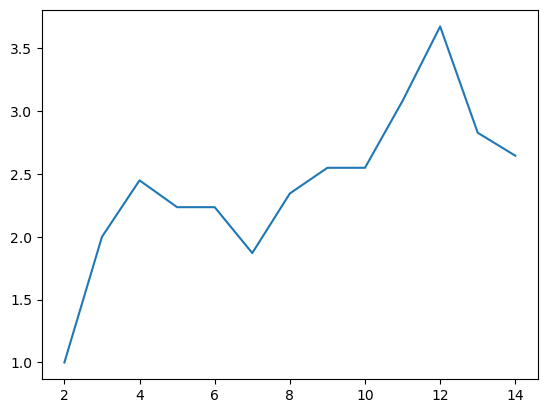

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Function to compute pairwise distances between points in different clusters
def inter_cluster_distances(X, labels):
    n_clusters = len(np.unique(labels))
    cluster_distances = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            mask_i = labels == i
            mask_j = labels == j
            cluster_distances[i, j] = np.min(pairwise_distances(X[mask_i], X[mask_j]))
            cluster_distances[j, i] = cluster_distances[i, j]
    return cluster_distances

# Function to compute Dunn's index
def dunn_index(X, labels):
    cluster_distances = inter_cluster_distances(X, labels)
    min_intra_cluster_distances = np.min(np.ma.masked_where(cluster_distances == 0, cluster_distances), axis=1)
    max_inter_cluster_distance = np.max(cluster_distances)
    return max_inter_cluster_distance / np.max(min_intra_cluster_distances)

k_range = range(2, 15)
dunn_values = []

for k in k_range:
    # Create k-means object and fit to data
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(df)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Compute Dunn's index
    dunn_values.append(dunn_index(df, labels))
    
for i in range(len(dunn_values)):
    print((i + 2), " : ", dunn_values[i])

plt.plot(k_range, dunn_values)


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

2  :  0.26873097259208456
3  :  0.2725483489513384
4  :  0.24581213692484202
5  :  0.24841089380311465
6  :  0.2550870768768716
7  :  0.263157395001896
8  :  0.27702335638642905
9  :  0.2911923706717801
10  :  0.28216205996637034
11  :  0.30288459300367576
12  :  0.28902109643582125
13  :  0.3124619397611367
14  :  0.317560057560629
15  :  0.31517822664900497
16  :  0.31096767914897805
17  :  0.3504057922792517
18  :  0.3357781630933499
19  :  0.3536044748232569


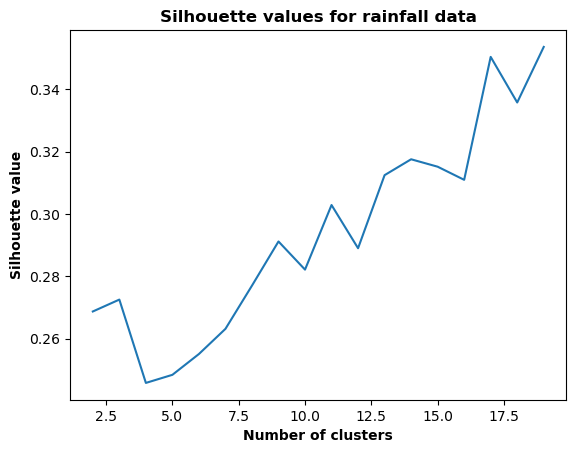

In [4]:
#Validating the number of clusters using silhouette index

k_range = range(2, 20)
silhouette_values=[]

for k in k_range:
    # Create k-means object and fit to data
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=30)
    kmeans.fit(df)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_values.append(silhouette_score(df, labels))
    
for i in range(len(silhouette_values)):
    print((i+2)," : ",silhouette_values[i])
plt.plot(k_range,silhouette_values)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.xlabel("Number of clusters",fontweight='bold',fontsize=10)
plt.ylabel("Silhouette value",fontweight='bold',fontsize=10)
plt.title("Silhouette values for rainfall data",fontweight='bold',fontsize=12)
plt.savefig("Silhouette values for rainfall data.png")

C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

2  :  0.26873097259208456
3  :  0.2725483489513384
4  :  0.24581213692484202
5  :  0.24841089380311465
6  :  0.2550870768768716
7  :  0.263157395001896
8  :  0.27702335638642905
9  :  0.2911923706717801
10  :  0.28216205996637034
11  :  0.30288459300367576
12  :  0.28902109643582125
13  :  0.3124619397611367
14  :  0.317560057560629
15  :  0.31517822664900497
16  :  0.31096767914897805
17  :  0.3504057922792517
18  :  0.3357781630933499
19  :  0.3536044748232569
20  :  0.338767777195829
21  :  0.3775760426703259
22  :  0.3801803816021486
23  :  0.3934744590665143
24  :  0.40524571818215804
25  :  0.3883715733470312
26  :  0.4132083536519605
27  :  0.4037143024509545
28  :  0.4167656298315474
29  :  0.4314311427490351


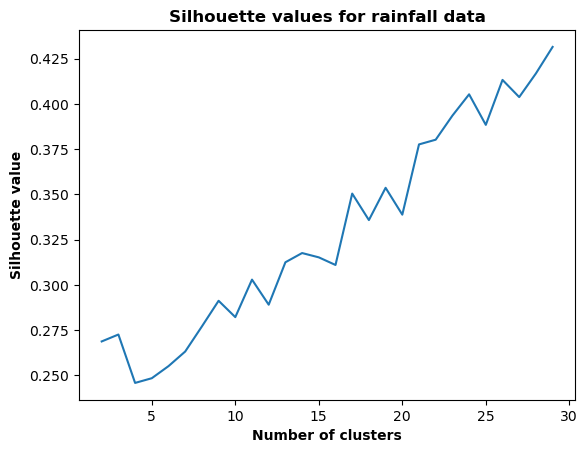

In [20]:
# #Validating the number of clusters using silhouette index

# k_range = range(2, 30)
# silhouette_values=[]

# for k in k_range:
#     # Create k-means object and fit to data
#     kmeans = KMeans(n_clusters=k,random_state=42,n_init=30)
#     kmeans.fit(df)
    
#     # Get cluster labels
#     labels = kmeans.labels_
    
#     # Compute silhouette score
#     silhouette_values.append(silhouette_score(df, labels))
    
# for i in range(len(silhouette_values)):
#     print((i+2)," : ",silhouette_values[i])
# plt.plot(k_range,silhouette_values)
# plt.tick_params(axis='x', labelsize=10)
# plt.tick_params(axis='y', labelsize=10)
# plt.xlabel("Number of clusters",fontweight='bold',fontsize=10)
# plt.ylabel("Silhouette value",fontweight='bold',fontsize=10)
# plt.title("Silhouette values for rainfall data",fontweight='bold',fontsize=12)
# plt.savefig("Silhouette values for rainfall data.png")

In [6]:
km = KMeans(n_clusters=9,random_state=42,n_init=30)
km.fit(df) 

values=km.labels_
vals=[i for i in values]
    
cnt=[0 for i in range(9)]
for i in range(len(vals)):
    cnt[vals[i]]+=1
print("Number of years in each cluster\n",cnt)

Number of years in each cluster
 [9, 8, 11, 36, 12, 5, 10, 6, 13]


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
vals

[2,
 6,
 4,
 5,
 1,
 1,
 3,
 8,
 8,
 4,
 2,
 3,
 3,
 3,
 2,
 0,
 0,
 5,
 3,
 6,
 3,
 7,
 3,
 4,
 7,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 8,
 3,
 1,
 7,
 3,
 4,
 2,
 3,
 1,
 3,
 3,
 8,
 8,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 7,
 3,
 3,
 8,
 3,
 3,
 0,
 3,
 0,
 1,
 3,
 4,
 6,
 6,
 3,
 2,
 2,
 0,
 7,
 5,
 8,
 6,
 0,
 8,
 8,
 3,
 6,
 7,
 4,
 2,
 0,
 6,
 6,
 2,
 5,
 0,
 3,
 3,
 4,
 3,
 3,
 0,
 3,
 4,
 3,
 4,
 2,
 4,
 1,
 5,
 8,
 6,
 3,
 8,
 4,
 1,
 6,
 8]

In [8]:
# df = pd.DataFrame(vals, columns=(['Cluster Number']))
# df.to_csv('Cluster Number 1901-2010.csv')

In [9]:
# labels = kmeans.labels_
# labels
km.inertia_


91.98768453768452

In [10]:
years_Cluster={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
}

years_Cluster_not_indexs={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    8:[]
}

yr=1901
indx=0
for i in range(len(values)):
    years_Cluster[values[i]].append(indx)
    years_Cluster_not_indexs[values[i]].append(yr)
    indx+=1
    yr+=1

years_Cluster_not_indexs


{0: [1916, 1917, 1959, 1961, 1970, 1975, 1983, 1988, 1994],
 1: [1905, 1906, 1935, 1941, 1952, 1962, 2001, 2008],
 2: [1901, 1911, 1915, 1939, 1948, 1951, 1968, 1969, 1982, 1986, 1999],
 3: [1907,
  1912,
  1913,
  1914,
  1919,
  1921,
  1923,
  1927,
  1928,
  1929,
  1930,
  1931,
  1932,
  1934,
  1937,
  1940,
  1942,
  1943,
  1946,
  1949,
  1950,
  1954,
  1955,
  1957,
  1958,
  1960,
  1963,
  1967,
  1978,
  1989,
  1990,
  1992,
  1993,
  1995,
  1997,
  2005],
 4: [1903, 1910, 1924, 1938, 1947, 1964, 1981, 1991, 1996, 1998, 2000, 2007],
 5: [1904, 1918, 1972, 1987, 2002],
 6: [1902, 1920, 1965, 1966, 1974, 1979, 1984, 1985, 2004, 2009],
 7: [1922, 1925, 1936, 1953, 1971, 1980],
 8: [1908,
  1909,
  1926,
  1933,
  1944,
  1945,
  1956,
  1973,
  1976,
  1977,
  2003,
  2006,
  2010]}

In [11]:
for i in years_Cluster_not_indexs.values():
    print(len(i))

9
8
11
36
12
5
10
6
13


In [13]:
def PlotMap(data,cluster=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])
    
    
    
#     cbar = plt.colorbar(im, ax=ax, label='Rainfall')
        
    # Increase the size of x-axis tick labels
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

 
    
    # Set axis labels
#     ax.set_xlabel('Longitude')
#     ax.set_ylabel('Latitude')
    ax.set_title(f'Cluster {cluster}',fontsize=20,fontweight='bold')
    
    plt.savefig(f'Cluster {cluster}.png')


In [16]:
def PlotAllMap(data):
    # Create a figure and axis for the plot
    fig, axes = plt.subplots(1, 9, figsize=(60, 5)) 
    
    for i, ax in enumerate(axes.ravel()):
        # Create a colormap
        cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

        # Determine the appropriate color limits based on your data
        vmin = -1.0  # Minimum value for the color scale
        vmax = 1.0  # Maximum value for the color scale

        # Plot the average yearly rainfall data using the colormap
        im = ax.imshow(data[i], cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                       extent=[data[i]['lon'].min(), data[i]['lon'].max(),
                               data[i]['lat'].min(), data[i]['lat'].max()])
        
        if i==8:
          # Add colorbar
            cbar = plt.colorbar(im, ax=ax, label='Rainfall')

        # Set axis labels
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'Cluster {i+1}')
    
#     plt.savefig(f'Rainfall 9 Clusters.png')


In [14]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]
zone7=[]
zone8=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]

#Storing the paths in a array
for i in range(1901,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 7\Zone7_Anomaly_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 8\Zone8_Anomaly_{i}.nc")

    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))
    zone7.append(xarray.open_dataset(path7[i]))
    zone8.append(xarray.open_dataset(path8[i]))


In [15]:
def getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster_years):
    cluster_zone1=[]
    cluster_zone2=[]
    cluster_zone3=[]
    cluster_zone4=[]
    cluster_zone5=[]
    cluster_zone6=[]
    cluster_zone7=[]
    cluster_zone8=[]
    

    for i in cluster_years:
        cluster_zone1.append(zone1[i])
        cluster_zone2.append(zone2[i])
        cluster_zone3.append(zone3[i])
        cluster_zone4.append(zone4[i])
        cluster_zone5.append(zone5[i])
        cluster_zone6.append(zone6[i])
        cluster_zone7.append(zone7[i])
        cluster_zone8.append(zone8[i])

    cluster_zone1_combined=xarray.concat(cluster_zone1,dim='years')
    cluster_zone2_combined=xarray.concat(cluster_zone2,dim='years')
    cluster_zone3_combined=xarray.concat(cluster_zone3,dim='years')
    cluster_zone4_combined=xarray.concat(cluster_zone4,dim='years')
    cluster_zone5_combined=xarray.concat(cluster_zone5,dim='years')
    cluster_zone6_combined=xarray.concat(cluster_zone6,dim='years')
    cluster_zone7_combined=xarray.concat(cluster_zone7,dim='years')
    cluster_zone8_combined=xarray.concat(cluster_zone8,dim='years')


    cluster_zone1_mean=cluster_zone1_combined['rain'].mean(dim='years')
    cluster_zone2_mean=cluster_zone2_combined['rain'].mean(dim='years')
    cluster_zone3_mean=cluster_zone3_combined['rain'].mean(dim='years')
    cluster_zone4_mean=cluster_zone4_combined['rain'].mean(dim='years')
    cluster_zone5_mean=cluster_zone5_combined['rain'].mean(dim='years')
    cluster_zone6_mean=cluster_zone6_combined['rain'].mean(dim='years')
    cluster_zone7_mean=cluster_zone7_combined['rain'].mean(dim='years')
    cluster_zone8_mean=cluster_zone8_combined['rain'].mean(dim='years')



    cluster_fullMap=cluster_zone1_mean.combine_first(cluster_zone2_mean.combine_first(cluster_zone3_mean.combine_first(cluster_zone4_mean.combine_first(
                    cluster_zone5_mean.combine_first(cluster_zone6_mean.combine_first(cluster_zone7_mean.combine_first(cluster_zone8_mean)))))))
    
    return cluster_fullMap

In [16]:
#Getting the cluster zonal data and meaning them
cluster1_years=years_Cluster[0]
cluster2_years=years_Cluster[1]
cluster3_years=years_Cluster[2]
cluster4_years=years_Cluster[3]
cluster5_years=years_Cluster[4]
cluster6_years=years_Cluster[5]
cluster7_years=years_Cluster[6]
cluster8_years=years_Cluster[7]
cluster9_years=years_Cluster[8]

cluster1_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster1_years)
cluster2_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster2_years)
cluster3_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster3_years)
cluster4_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster4_years)
cluster5_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster5_years)
cluster6_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster6_years)
cluster7_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster7_years)
cluster8_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster8_years)
cluster9_fullMap=getFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster9_years)


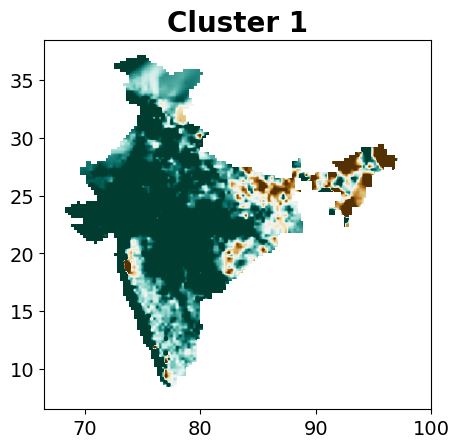

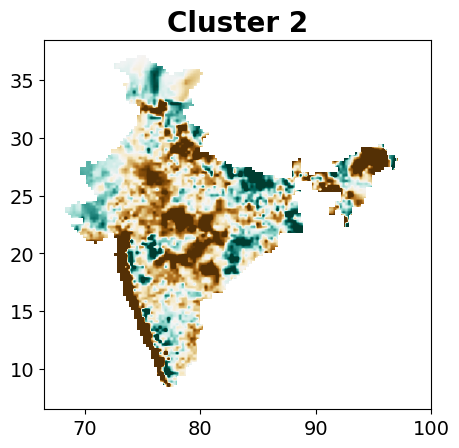

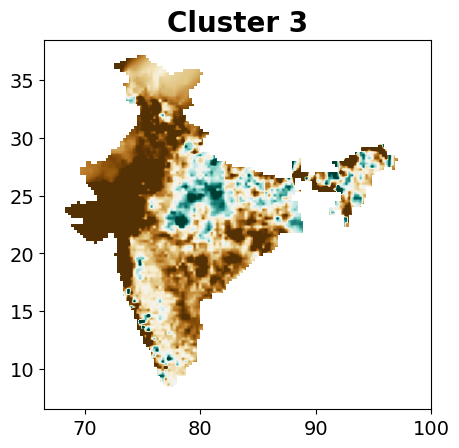

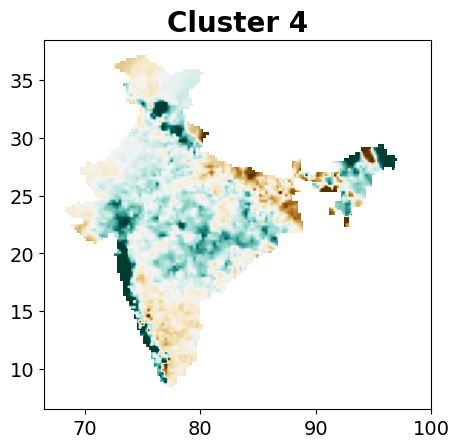

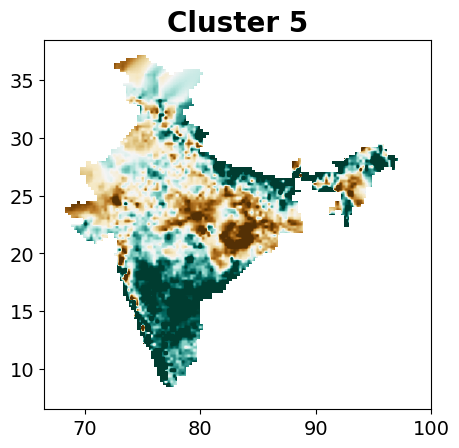

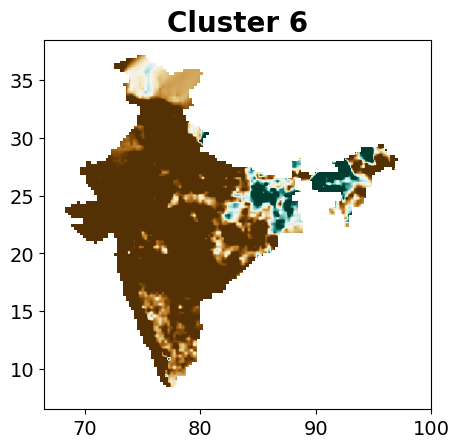

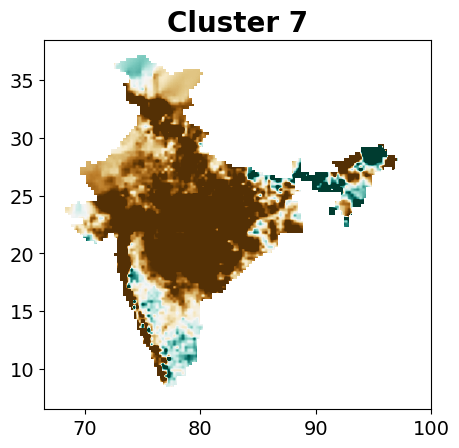

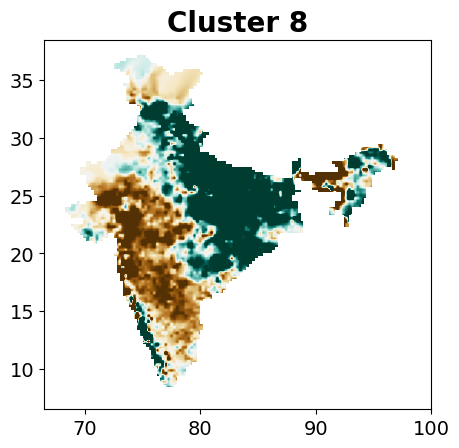

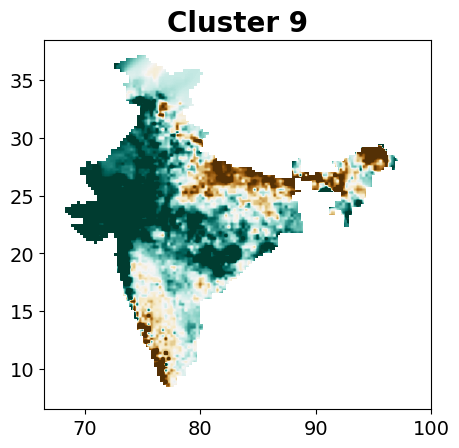

In [17]:
PlotMap(cluster1_fullMap,cluster=1)
PlotMap(cluster2_fullMap,cluster=2)
PlotMap(cluster3_fullMap,cluster=3)
PlotMap(cluster4_fullMap,cluster=4)
PlotMap(cluster5_fullMap,cluster=5)
PlotMap(cluster6_fullMap,cluster=6)
PlotMap(cluster7_fullMap,cluster=7)
PlotMap(cluster8_fullMap,cluster=8)
PlotMap(cluster9_fullMap,cluster=9)


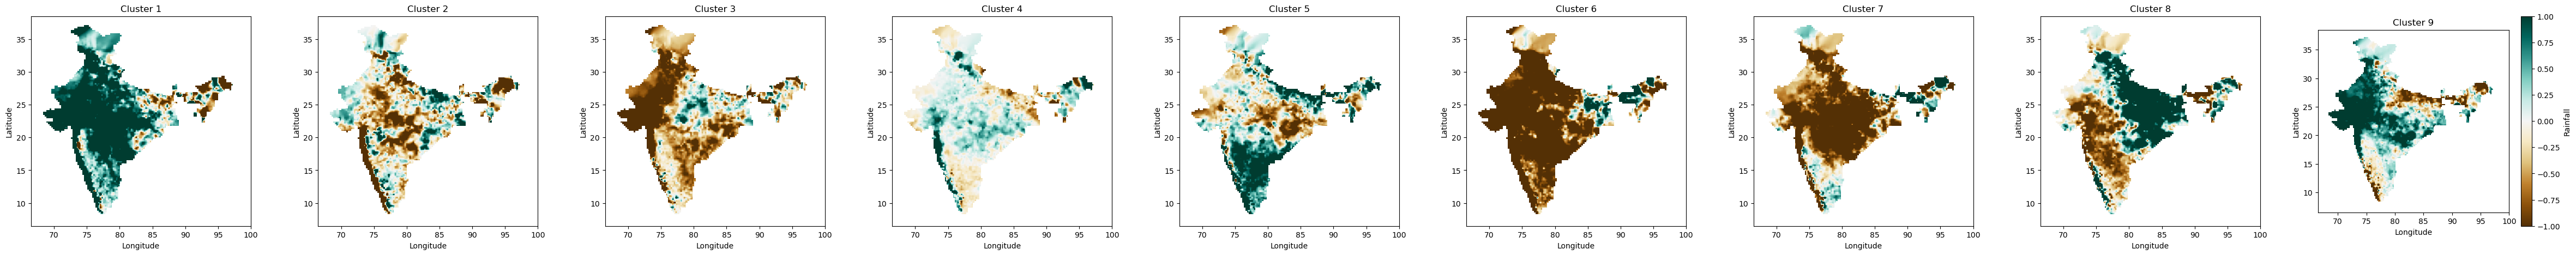

In [21]:
arr=[cluster1_fullMap,cluster2_fullMap,cluster3_fullMap,cluster4_fullMap,cluster5_fullMap,cluster6_fullMap,
    cluster7_fullMap,cluster8_fullMap,cluster9_fullMap]
PlotAllMap(arr)


In [22]:
#Accessing the zone files
zone1_predict=[]
zone2_predict=[]
zone3_predict=[]
zone4_predict=[]
zone5_predict=[]
zone6_predict=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]

#Storing the paths in a array
for i in range(2011,2023):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1_predict.append(xarray.open_dataset(path1[i]))
    zone2_predict.append(xarray.open_dataset(path2[i]))
    zone3_predict.append(xarray.open_dataset(path3[i]))
    zone4_predict.append(xarray.open_dataset(path4[i]))
    zone5_predict.append(xarray.open_dataset(path5[i]))
    zone6_predict.append(xarray.open_dataset(path6[i]))

In [23]:
predict_category=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rain Category 2011-2022.csv",index_col=0)
predict_category

,zone1,zone2,zone3,zone4,zone5,zone6
0,6,4,5,3,4,5
1,4,4,5,3,4,4
2,5,4,4,4,5,5
3,4,3,4,4,3,4
4,4,3,4,4,3,2
5,4,4,4,4,4,4
6,4,3,4,5,3,4
7,4,4,4,4,4,4
8,5,4,5,4,5,6
9,5,4,6,5,4,5


In [24]:
predicted=km.predict(predict_category)

In [25]:
predicted

array([0, 4, 0, 6, 1, 3, 6, 3, 0, 4, 3, 8])

In [27]:
yr=2011
indx=110
for i in range(len(predicted)):
    years_Cluster[predicted[i]].append(indx)
    years_Cluster_not_indexs[predicted[i]].append(yr)
    indx+=1
    yr+=1


In [28]:
years_Cluster_not_indexs

{0: [1916, 1917, 1959, 1961, 1970, 1975, 1983, 1988, 1994, 2011, 2013, 2019],
 1: [1905, 1906, 1935, 1941, 1952, 1962, 2001, 2008, 2015],
 2: [1901, 1911, 1915, 1939, 1948, 1951, 1968, 1969, 1982, 1986, 1999],
 3: [1907,
  1912,
  1913,
  1914,
  1919,
  1921,
  1923,
  1927,
  1928,
  1929,
  1930,
  1931,
  1932,
  1934,
  1937,
  1940,
  1942,
  1943,
  1946,
  1949,
  1950,
  1954,
  1955,
  1957,
  1958,
  1960,
  1963,
  1967,
  1978,
  1989,
  1990,
  1992,
  1993,
  1995,
  1997,
  2005,
  2016,
  2018,
  2021],
 4: [1903,
  1910,
  1924,
  1938,
  1947,
  1964,
  1981,
  1991,
  1996,
  1998,
  2000,
  2007,
  2012,
  2020],
 5: [1904, 1918, 1972, 1987, 2002],
 6: [1902, 1920, 1965, 1966, 1974, 1979, 1984, 1985, 2004, 2009, 2014, 2017],
 7: [1922, 1925, 1936, 1953, 1971, 1980],
 8: [1908,
  1909,
  1926,
  1933,
  1944,
  1945,
  1956,
  1973,
  1976,
  1977,
  2003,
  2006,
  2010,
  2022]}

In [29]:
for i in years_Cluster_not_indexs.values():
    print(len(i))

12
9
11
39
14
5
12
6
14


In [22]:
# df = pd.DataFrame(predicted, columns=(['Cluster Number']))
# df.to_csv('Cluster Number 2011-2022.csv')
# df

In [46]:
df = pd.DataFrame(vals, columns=(['Cluster Number']))
df=df[df['Cluster Number']==3]
years_with_cluster_3=list(df.index)

In [47]:
years_with_cluster_3

[6,
 11,
 12,
 13,
 18,
 20,
 22,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 36,
 39,
 41,
 42,
 45,
 48,
 49,
 53,
 54,
 56,
 57,
 59,
 62,
 66,
 77,
 88,
 89,
 91,
 92,
 94,
 96,
 104]

In [48]:
df=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rain Category 1901-2010.csv",index_col=0)
df

,zone1,zone2,zone3,zone4,zone5,zone6
0,3,3,4,4,4,4
1,4,4,4,4,3,4
2,4,4,5,4,4,4
3,3,4,3,4,3,3
4,3,4,4,4,3,2
...,...,...,...,...,...,...
105,5,4,4,3,4,5
106,4,4,6,5,4,5
107,4,5,4,4,4,3
108,4,3,4,4,3,4


In [53]:
df=df.loc[years_with_cluster_3]

In [54]:
df

,zone1,zone2,zone3,zone4,zone5,zone6
6,4,4,4,4,4,4
11,4,4,4,4,4,4
12,4,4,4,4,4,4
13,4,4,4,4,5,5
18,4,4,4,4,5,4
20,4,4,4,4,4,4
22,4,4,4,4,4,5
26,4,4,4,4,4,4
27,4,3,4,4,4,4
28,4,4,4,4,4,4


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

2  :  0.49933164632877847
3  :  0.59637849445328
4  :  0.6504252169324221
5  :  0.7196209425623719
6  :  0.8072405795215596
7  :  0.8435560841153767
8  :  0.8611111111111112
9  :  0.8888888888888888
10  :  0.8888888888888888
11  :  0.8888888888888888
12  :  0.8888888888888888
13  :  0.8888888888888888
14  :  0.8888888888888888


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


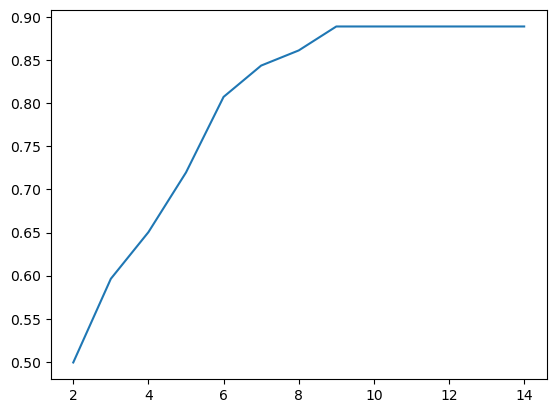

In [55]:
#Validating the number of clusters using silhouette index
# df = pd.DataFrame(vals, columns=(['Cluster Number']))

k_range = range(2, 15)
silhouette_values=[]

for k in k_range:
    # Create k-means object and fit to data
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=30)
    kmeans.fit(df)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_values.append(silhouette_score(df, labels))
    
for i in range(len(silhouette_values)):
    print((i+2)," : ",silhouette_values[i])
plt.plot(k_range,silhouette_values)